# <font color='purple'>Preprocessing QC statistics for Perturbations</font> 
## Noam, July 2023


In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import os
MOMAPS_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps' # because I'm running from Sagy's user
LOGS_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'logs')
PLOT_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'notebooks','figures','Perturbations')
os.chdir(MOMAPS_HOME)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
sns.color_palette("husl", 8)
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams.update({'figure.autolayout': True})
from tqdm.notebook import tqdm
from src.common.lib.preprocessing_utils import rescale_intensity
from src.common.lib.images_qc import *
sys.path.insert(1, "/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/src/common/lib")
import contextlib
import io
import matplotlib
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
from src.common.lib.qc_config_tmp import *


In [19]:
df = log_files_qc(LOGS_PATH)


Total of 13 files were read.
Before dup handeling  (144586, 20)
After duplication removal #1: (125179, 21)
After duplication removal #2: (123775, 21)


## validate folder structure and files existence

In [7]:
# choose batches
batches = ['Perturbations']

### Raw Files

Perturbations
Folder structure is valid.
All files exists.


/home/labs/hornsteinlab/Collaboration/MOmaps/src/common/lib/images_qc.py:355: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  colored_df['Rep'] = 'white'
/home/labs/hornsteinlab/Collaboration/MOmaps/anaconda3/momaps_37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


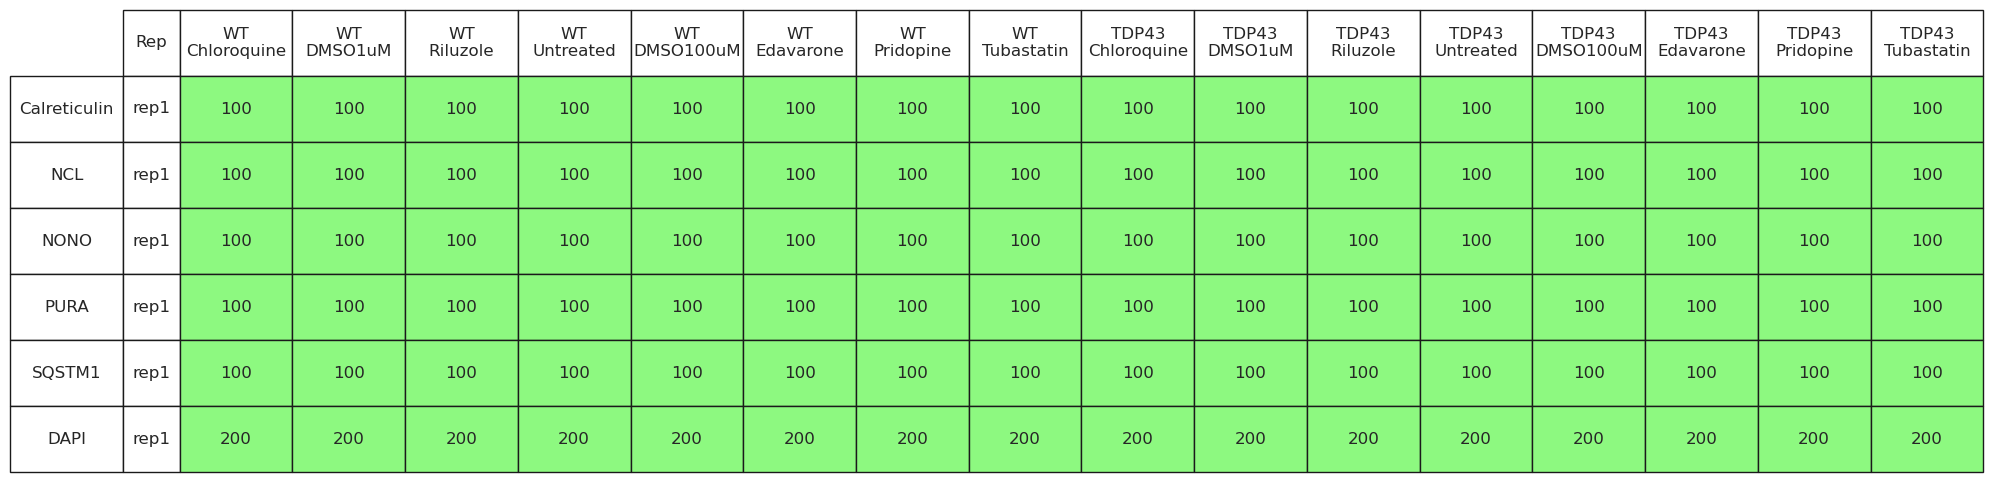

In [56]:

root_directory_raw = os.path.join(MOMAPS_HOME, 'input', 'images', 'raw', 'SpinningDisk')

batches_raw = [batch.replace("_16bit","") for batch in batches]
raws = run_validate_folder_structure(root_directory_raw, False, per_panels, per_markers,PLOT_PATH,per_marker_info,
                                    per_cell_lines_to_cond, per_reps, per_cell_lines_for_disp,per_expected_dapi_raw,
                                     2, batches=batches_raw)

### Processed

Perturbations
Folder structure is valid.
All files exists.


/home/labs/hornsteinlab/Collaboration/MOmaps/src/common/lib/images_qc.py:333: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.show()


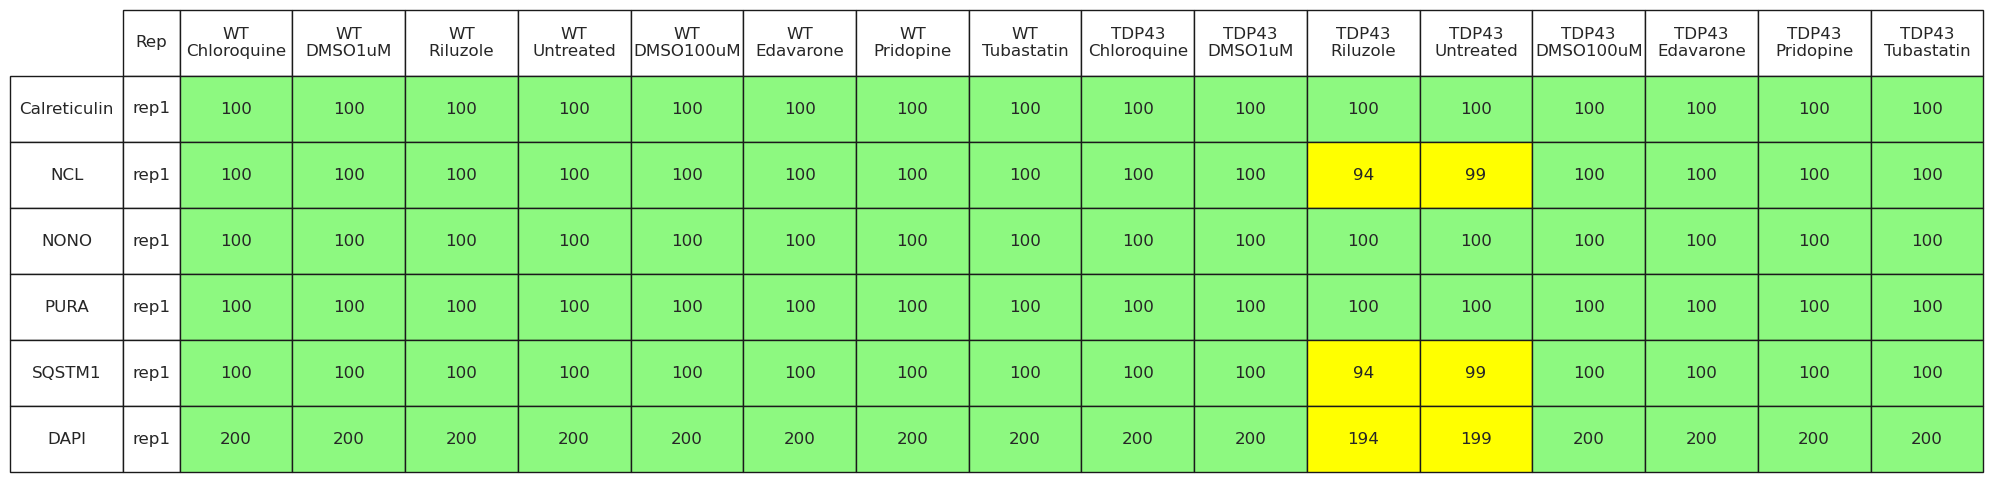

In [30]:
root_directory_proc = os.path.join(MOMAPS_HOME, 'input', 'images', 'processed', 'spd2',
                              'SpinningDisk')
procs = run_validate_folder_structure(root_directory_proc, True, per_panels, per_markers,PLOT_PATH,per_marker_info,
                                    per_cell_lines_to_cond, per_reps, per_cell_lines_for_disp,per_expected_dapi_raw,
                                     2, batches=batches_raw)

### Difference between Raw and Processed

Perturbations


/home/labs/hornsteinlab/Collaboration/MOmaps/src/common/lib/images_qc.py:361: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  expected_dapi_raw,fig_height=8,


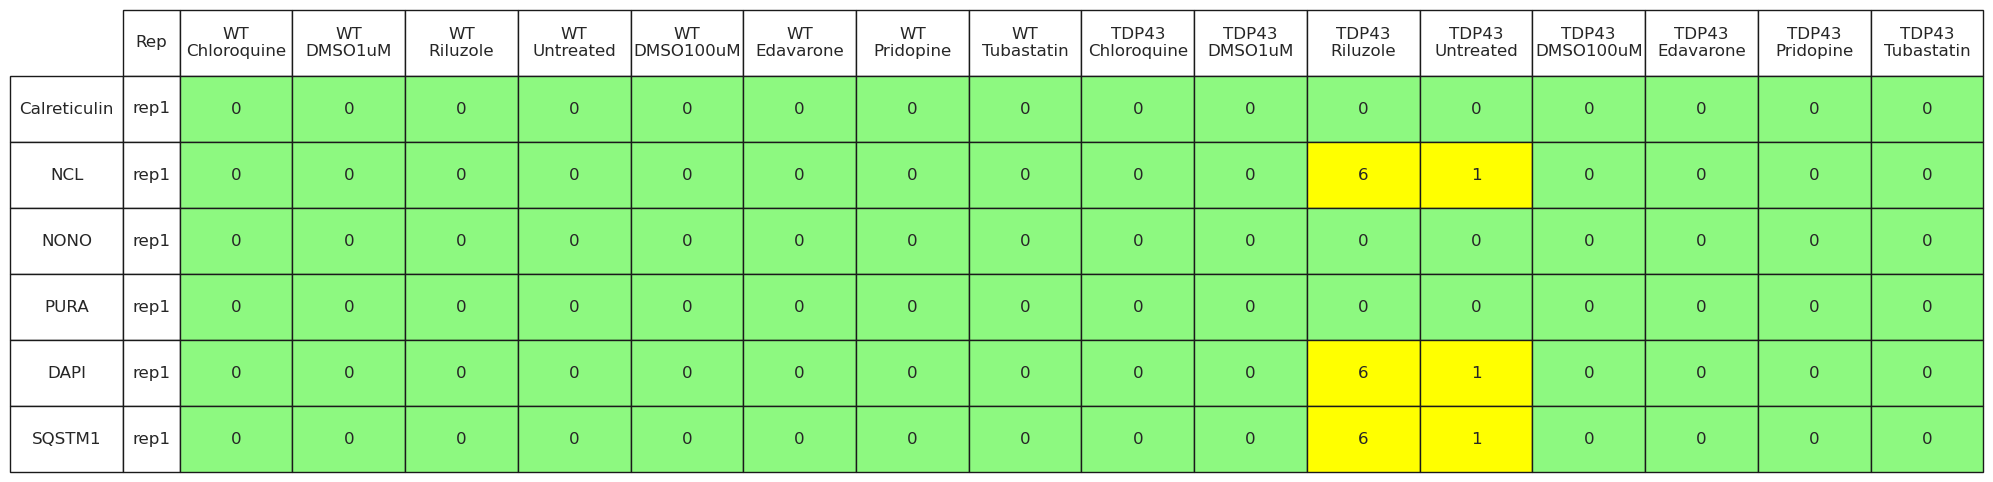

In [32]:
display_diff(batches, raws, procs, PLOT_PATH,2)

In [36]:
for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, sample_size_per_markers=200, num_markers=26)
    print(f'{batch} var: ',var)


Perturbations var:  0.012453681375230159



# <font color='red'>Number of sites in each batch and cell line </font>


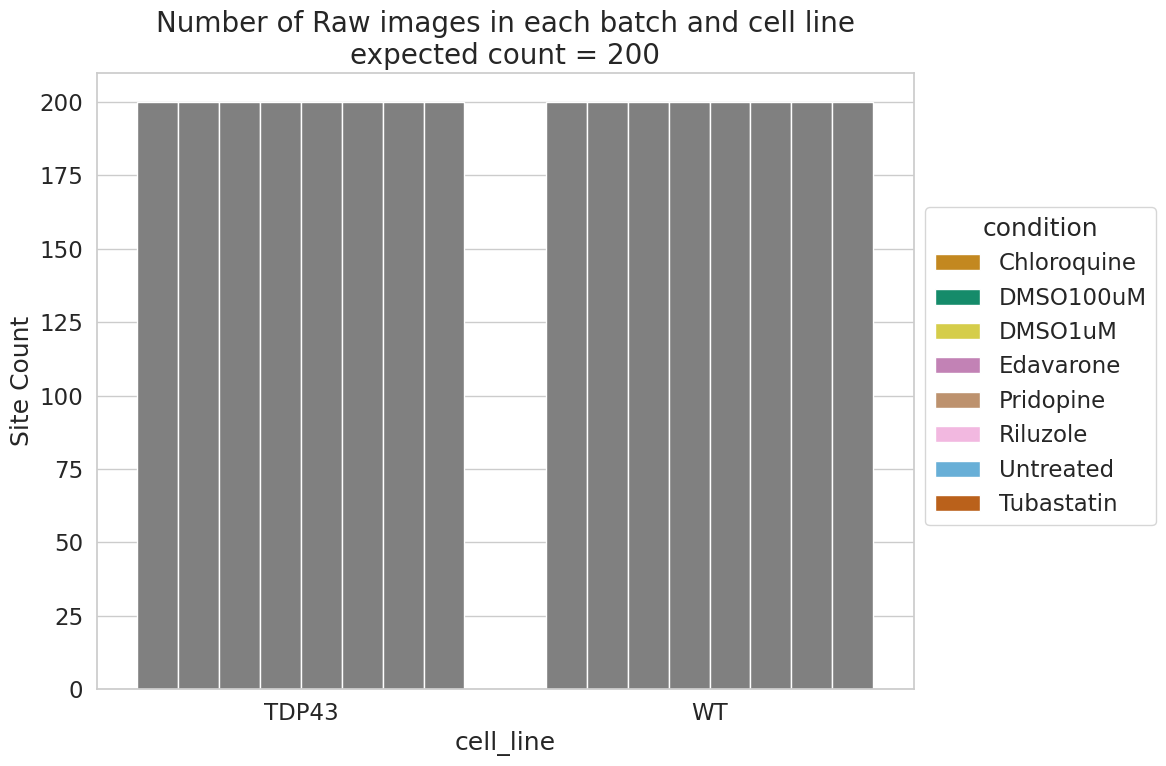

In [40]:
df_per = df[df.batch=='Perturbations']
plot_sites_count(df_per, per_expected_raw, condition_order, per_custom_palette, split_to_reps=False)

# <font color='red'>Number of Cells in Site for each batch and cell line </font>

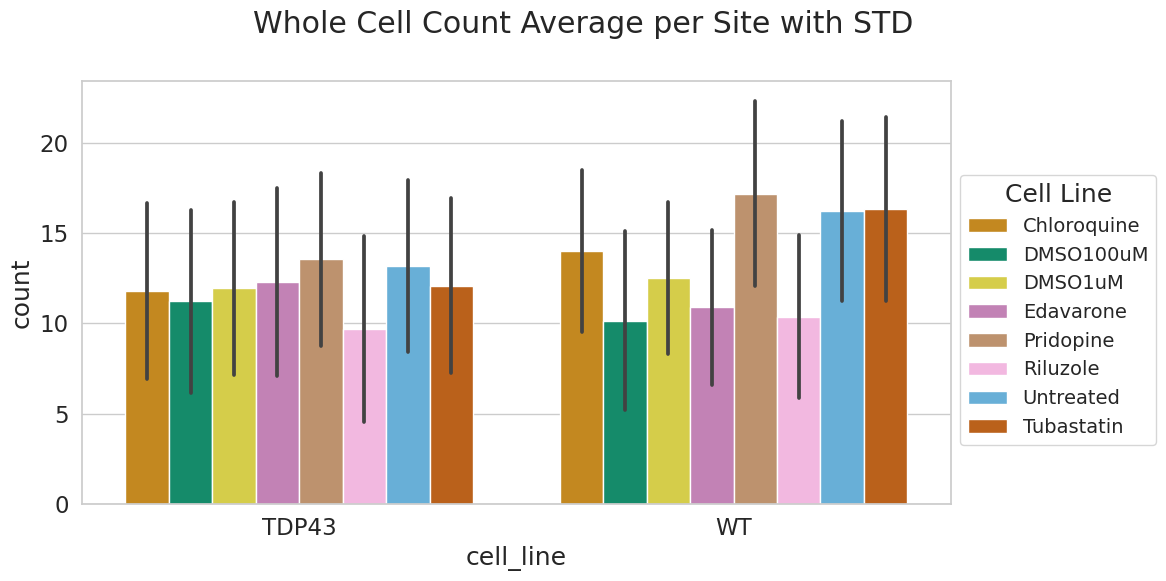

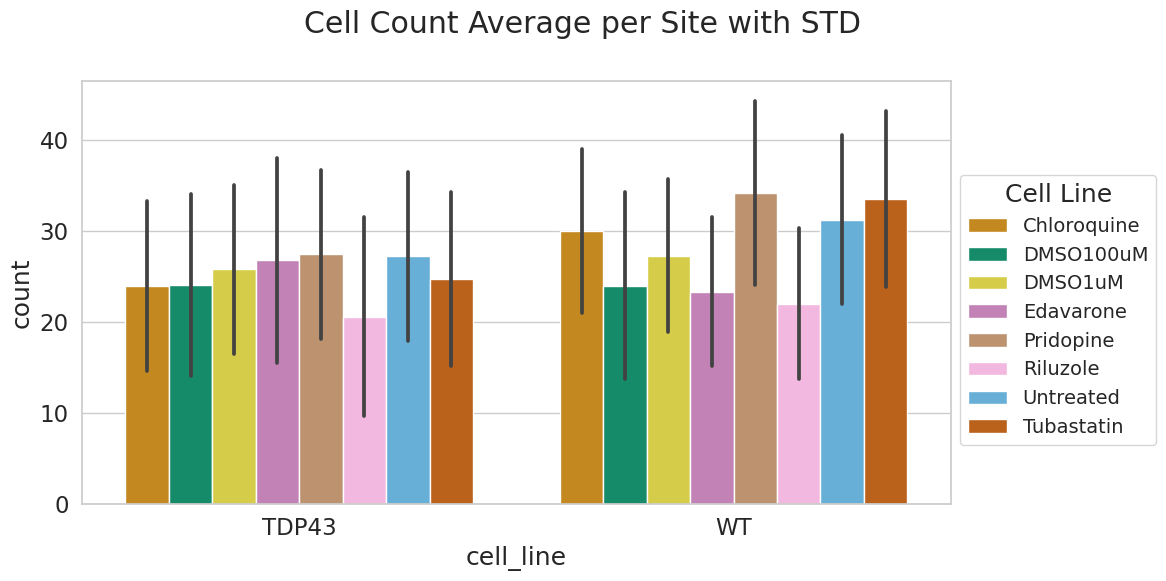

In [41]:
df_no_empty_sites = df_per[df_per.n_valid_tiles !=0]
plot_cell_count(df_no_empty_sites, condition_order, per_custom_palette, whole_cells=True)

plot_cell_count(df_no_empty_sites, condition_order, per_custom_palette, whole_cells=False)
# can add norm=True to norm by max


# <font color='blue'>number of valid tiles </font>


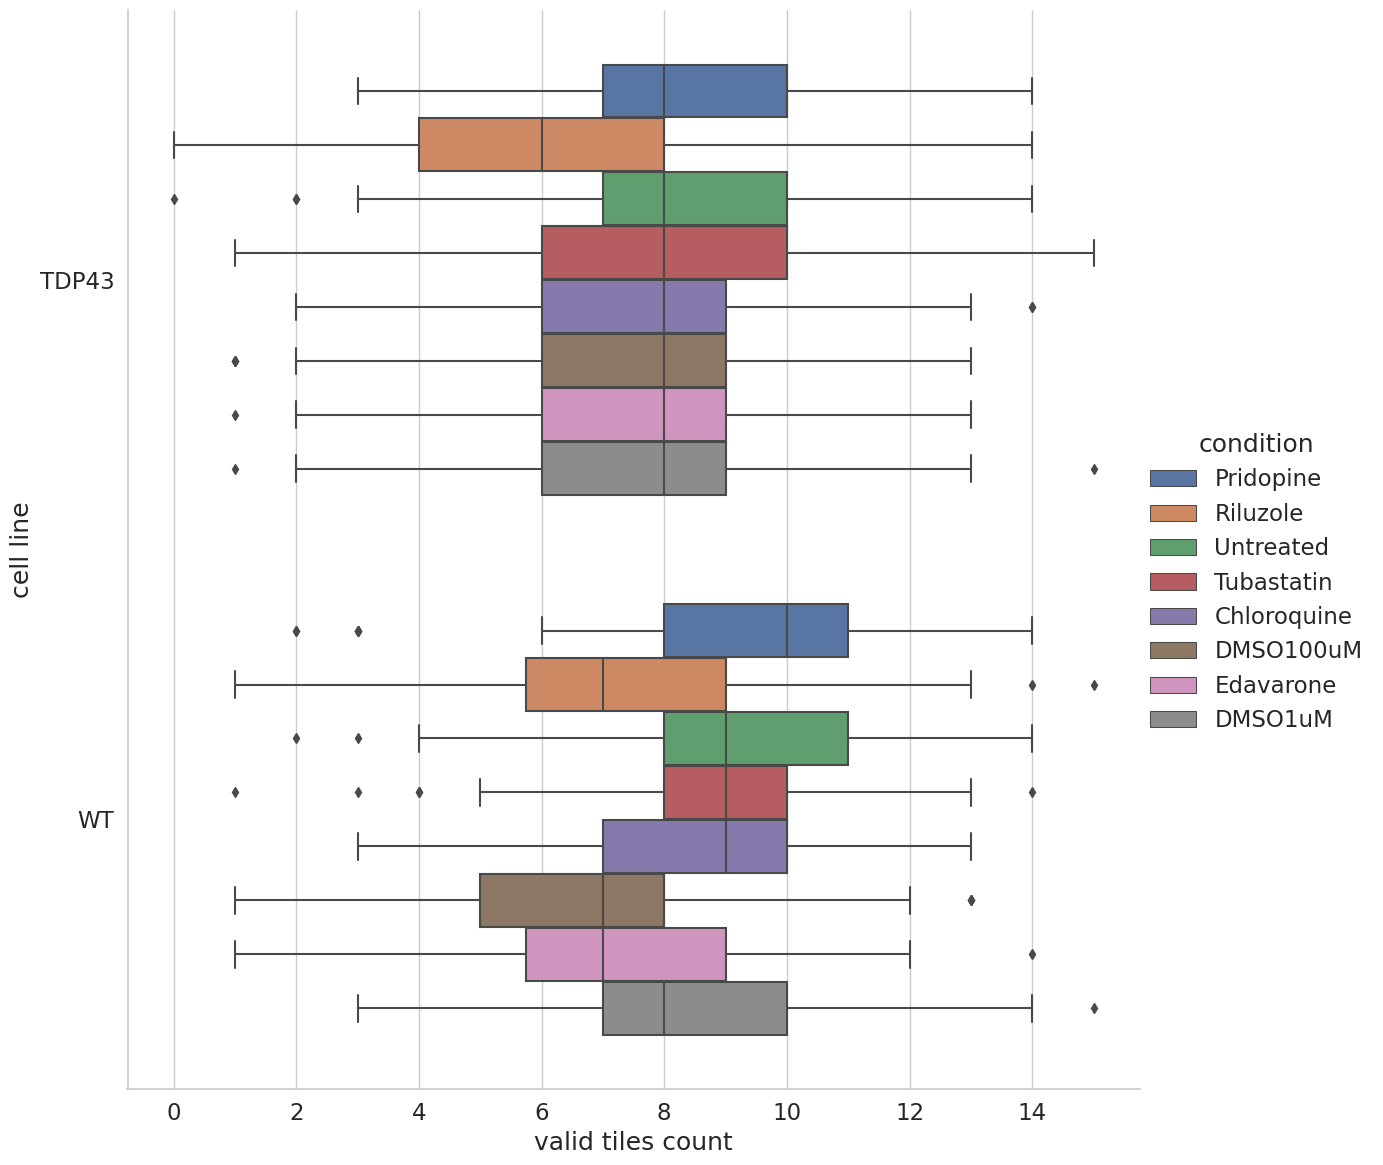

In [42]:
plot_n_valid_tiles_count(df_per, per_custom_palette, per_reps)


## <font color='purple'>Heatmap QC per batch, panel and cell line(tiles that passed QC condition)  </font>


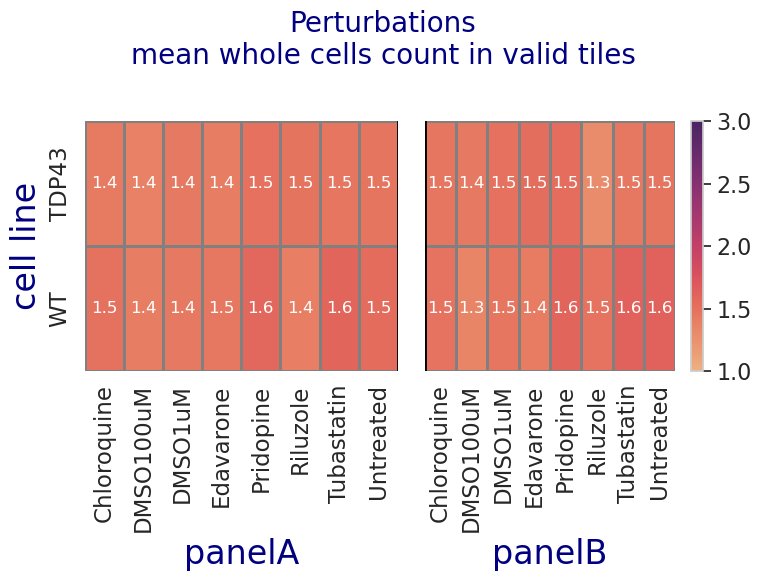

In [46]:
plot_hm(df_per, split_by='panel', rows='cell_line', columns='condition')

In [65]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system('jupyter nbconvert --to html src/preprocessing/notebooks/cell_count_stats_analysis_Perturbations.ipynb')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook src/preprocessing/notebooks/cell_count_stats_analysis_Perturbations.ipynb to html
[NbConvertApp] Writing 828959 bytes to src/preprocessing/notebooks/cell_count_stats_analysis_Perturbations.html


0

In [14]:
print(os.system('pwd'))
print("Done!")

/home/labs/hornsteinlab/Collaboration/MOmaps
0
Done!


# Assessing Staining Reproducibility and Outliers

In [57]:
run_calc_hist_new('Perturbations',per_cell_lines_for_disp, per_markers, 
                  num_markers=((len(per_markers)-1)+per_panels.shape[1])*2,
                  show_cond=True,sample_size_per_markers=1)



[sample_images_all_markers_all_lines]: input_dir_batch:/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/Perturbations, _sample_size_per_markers:1, _num_markers:14
sampled_images: 14 sampled_markers: 14
sampled_images: 28 sampled_markers: 28


[sample_images_all_markers_all_lines]: input_dir_batch:/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/Perturbations, _sample_size_per_markers:2, _num_markers:6
sampled_images: 12 sampled_markers: 6
sampled_images: 24 sampled_markers: 12


Total of 42 images were sampled for hist calculation.


Total of 36 images were sampled for hist calculation.


ValueError: cannot convert float NaN to integer